In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import glob

In [4]:
index_list = glob.glob('./crawling_data/x_data/index/*.csv')
exchage_list = glob.glob('./crawling_data/x_data/exchange/*.csv')
fuel_list = glob.glob('./crawling_data/x_data/fuel/*.csv')

In [5]:
index_dutch = pd.read_csv(index_list[0],index_col=0)
index_euro = pd.read_csv(index_list[1],index_col=0)
index_london = pd.read_csv(index_list[2],index_col=0)
index_nasdaq = pd.read_csv(index_list[3],index_col=0)
index_paris = pd.read_csv(index_list[4],index_col=0)
index_shanghai = pd.read_csv(index_list[5],index_col=0)

In [6]:
exchange_cny = pd.read_csv(exchage_list[0],index_col=0)
exchange_eur = pd.read_csv(exchage_list[1],index_col=0)
exchange_gbp = pd.read_csv(exchage_list[2],index_col=0)
exchange_usd = pd.read_csv(exchage_list[3],index_col=0)

In [7]:
fuel_dubai = pd.read_csv(fuel_list[0],index_col=0)
fuel_brent = pd.read_csv(fuel_list[1],index_col=0)
fuel_texas = pd.read_csv(fuel_list[2],index_col=0)

In [8]:
index_dutch.drop(['start','high','low'], axis=1, inplace=True)
index_euro.drop(['start','high','low'], axis=1, inplace=True)
index_london.drop(['start','high','low'], axis=1, inplace=True)
index_nasdaq.drop(['start','high','low'], axis=1, inplace=True)
index_paris.drop(['start','high','low'], axis=1, inplace=True)
index_shanghai.drop(['start','high','low'], axis=1, inplace=True)
index_dutch.columns = ['date','dutch_close']
index_euro.columns = ['date','euro_close']
index_london.columns = ['date','london_close']
index_nasdaq.columns = ['date','nasdaq_close']
index_paris.columns = ['date','paris_close']
index_shanghai.columns = ['date','shanghai_close']

In [9]:
exchange_cny.columns = ['date','cny_exchange']
exchange_eur.columns = ['date','eur_exchange']
exchange_gbp.columns = ['date','gbp_exchange']
exchange_usd.columns = ['date','usd_exchange']

In [10]:
fuel_dubai.columns = ['date', 'dubai_fuel']
fuel_brent.columns = ['date', 'brent_fuel']
fuel_texas.columns = ['date', 'texas_fuel']
fuel_dubai.date = fuel_dubai.date.apply(lambda x : x.replace('-','.'))
fuel_brent.date = fuel_brent.date.apply(lambda x : x.replace('-','.'))
fuel_texas.date = fuel_texas.date.apply(lambda x : x.replace('-','.'))

In [11]:
data_df = pd.merge(left = index_dutch , right = index_euro, how = "inner", on = "date")
data_df = pd.merge(left = data_df , right = index_london, how = "inner", on = "date")
data_df = pd.merge(left = data_df , right = index_nasdaq, how = "inner", on = "date")
data_df = pd.merge(left = data_df , right = index_paris, how = "inner", on = "date")
data_df = pd.merge(left = data_df , right = index_shanghai, how = "inner", on = "date")

data_df = pd.merge(left = data_df , right = exchange_cny, how = "inner", on = "date")
data_df = pd.merge(left = data_df , right = exchange_eur, how = "inner", on = "date")
data_df = pd.merge(left = data_df , right = exchange_gbp, how = "inner", on = "date")
data_df = pd.merge(left = data_df , right = exchange_usd, how = "inner", on = "date")

data_df = pd.merge(left = data_df , right = fuel_dubai, how = "inner", on = "date")
data_df = pd.merge(left = data_df , right = fuel_brent, how = "inner", on = "date")
data_df = pd.merge(left = data_df , right = fuel_texas, how = "inner", on = "date")
data_df.date = data_df.date.apply(lambda x : pd.to_datetime(x, format='%Y.%m.%d'))

In [12]:
carbon_credit = pd.read_excel('./crawling_data/배출권.xls')
carbon_credit.dropna(inplace=True)
carbon_credit.reset_index(inplace=True)
carbon_credit.drop('index', axis=1, inplace=True)
carbon_credit.columns = ['date','carbon_credit_price']
carbon_credit.drop([0,1], inplace=True)
carbon_credit.date = carbon_credit.date.apply(lambda x : pd.to_datetime(x, format='%Y-%m-%d'))

In [13]:
merge_df = pd.merge(left = data_df , right = carbon_credit, how = "inner", on = "date")
merge_df.sort_index(ascending=False, inplace=True)
merge_df = merge_df.reset_index().drop('index', axis=1)
merge_df.sort_index(ascending=True, inplace=True)
merge_df.set_index(merge_df['date'], inplace=True)
merge_df.drop('date', axis=1, inplace=True)
merge_df

,dutch_close,euro_close,london_close,nasdaq_close,paris_close,shanghai_close,cny_exchange,eur_exchange,gbp_exchange,usd_exchange,dubai_fuel,brent_fuel,texas_fuel,carbon_credit_price
date,,,,,,,,,,,,,,
2015-12-29,"10,860.14","5,107.94","3,563.74","6,314.57","4,701.36","3,314.28","1,283.25","1,741.53","1,168.50",177.71,37.87,37.79,34.66,37.32
2015-12-30,"10,743.01","5,065.85","3,572.88","6,274.05","4,677.14","3,287.98","1,283.14","1,738.97","1,173.00",178.10,36.60,36.46,34.57,37.05
2016-01-04,"10,283.44","4,903.09","3,296.26","6,093.43","4,522.45","3,164.76","1,299.65","1,756.77","1,189.50",179.60,36.76,37.22,32.10,36.29
2016-01-05,"10,310.10","4,891.43","3,287.71","6,137.24","4,537.63","3,178.01","1,283.71","1,746.66","1,189.50",179.00,35.97,36.42,30.84,36.06
2016-01-06,"10,214.02","4,835.77","3,361.84","6,073.38","4,480.47","3,139.32","1,287.96","1,756.44","1,200.00",178.65,33.97,34.23,28.99,34.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-26,"15,757.06","15,235.72","3,597.64","7,277.62","6,766.51","4,223.97","1,356.40","1,613.44","1,167.00",183.02,84.65,85.65,83.23,267.61
2021-10-27,"15,705.81","15,235.84","3,562.31","7,253.27","6,753.52","4,220.88","1,360.73","1,609.51","1,173.50",183.56,82.66,83.87,81.44,268.01
2021-10-28,"15,696.33","15,448.12","3,518.42","7,249.47","6,804.22","4,233.87","1,358.48","1,610.84","1,170.50",183.04,82.81,83.66,81.27,262.06


In [17]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2015-12-29 to 2021-11-01
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dutch_close          1304 non-null   float64
 1   euro_close           1304 non-null   float64
 2   london_close         1304 non-null   float64
 3   nasdaq_close         1304 non-null   float64
 4   paris_close          1304 non-null   float64
 5   shanghai_close       1304 non-null   float64
 6   cny_exchange         1304 non-null   object 
 7   eur_exchange         1304 non-null   float64
 8   gbp_exchange         1304 non-null   float64
 9   usd_exchange         1304 non-null   float64
 10  dubai_fuel           1304 non-null   float64
 11  brent_fuel           1304 non-null   float64
 12  texas_fuel           1304 non-null   float64
 13  carbon_credit_price  1304 non-null   object 
dtypes: float64(12), object(2)
memory usage: 152.8+ KB


In [14]:
merge_df['dutch_close'] = pd.to_numeric(merge_df['dutch_close'].apply(lambda x : x.replace(',','')))
merge_df['euro_close'] = pd.to_numeric(merge_df['euro_close'].apply(lambda x : x.replace(',','')))
merge_df['london_close'] = pd.to_numeric(merge_df['london_close'].apply(lambda x : x.replace(',','')))
merge_df['nasdaq_close'] = pd.to_numeric(merge_df['nasdaq_close'].apply(lambda x : x.replace(',','')))
merge_df['paris_close'] = pd.to_numeric(merge_df['paris_close'].apply(lambda x : x.replace(',','')))
merge_df['shanghai_close'] = pd.to_numeric(merge_df['shanghai_close'].apply(lambda x : x.replace(',','')))

merge_df['eur_exchange'] = pd.to_numeric(merge_df['eur_exchange'].apply(lambda x : x.replace(',','')))
merge_df['gbp_exchange'] = pd.to_numeric(merge_df['gbp_exchange'].apply(lambda x : x.replace(',','')))
merge_df['usd_exchange'] = pd.to_numeric(merge_df['usd_exchange'].apply(lambda x : x.replace(',','')))

merge_df['carbon_credit_price'] = pd.to_numeric(merge_df['carbon_credit_price'])
merge_df.info()

AttributeError: 'float' object has no attribute 'replace'

In [19]:

merge_df['cny_exchange'] = pd.to_numeric(merge_df['cny_exchange'].apply(lambda x : x.replace(',','')))

merge_df['carbon_credit_price'] = pd.to_numeric(merge_df['carbon_credit_price'])
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2015-12-29 to 2021-11-01
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dutch_close          1304 non-null   float64
 1   euro_close           1304 non-null   float64
 2   london_close         1304 non-null   float64
 3   nasdaq_close         1304 non-null   float64
 4   paris_close          1304 non-null   float64
 5   shanghai_close       1304 non-null   float64
 6   cny_exchange         1304 non-null   float64
 7   eur_exchange         1304 non-null   float64
 8   gbp_exchange         1304 non-null   float64
 9   usd_exchange         1304 non-null   float64
 10  dubai_fuel           1304 non-null   float64
 11  brent_fuel           1304 non-null   float64
 12  texas_fuel           1304 non-null   float64
 13  carbon_credit_price  1304 non-null   float64
dtypes: float64(14)
memory usage: 152.8 KB


In [15]:
#################### 여기까지 공통

# 0.  x값들 = 5일 이동 평균

In [20]:
merge_df 

,dutch_close,euro_close,london_close,nasdaq_close,paris_close,shanghai_close,cny_exchange,eur_exchange,gbp_exchange,usd_exchange,dubai_fuel,brent_fuel,texas_fuel,carbon_credit_price
date,,,,,,,,,,,,,,
2015-12-29,10860.14,5107.94,3563.74,6314.57,4701.36,3314.28,1283.25,1741.53,1168.5,177.71,37.87,37.79,34.66,37.32
2015-12-30,10743.01,5065.85,3572.88,6274.05,4677.14,3287.98,1283.14,1738.97,1173.0,178.10,36.60,36.46,34.57,37.05
2016-01-04,10283.44,4903.09,3296.26,6093.43,4522.45,3164.76,1299.65,1756.77,1189.5,179.60,36.76,37.22,32.10,36.29
2016-01-05,10310.10,4891.43,3287.71,6137.24,4537.63,3178.01,1283.71,1746.66,1189.5,179.00,35.97,36.42,30.84,36.06
2016-01-06,10214.02,4835.77,3361.84,6073.38,4480.47,3139.32,1287.96,1756.44,1200.0,178.65,33.97,34.23,28.99,34.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-26,15757.06,15235.72,3597.64,7277.62,6766.51,4223.97,1356.40,1613.44,1167.0,183.02,84.65,85.65,83.23,267.61
2021-10-27,15705.81,15235.84,3562.31,7253.27,6753.52,4220.88,1360.73,1609.51,1173.5,183.56,82.66,83.87,81.44,268.01
2021-10-28,15696.33,15448.12,3518.42,7249.47,6804.22,4233.87,1358.48,1610.84,1170.5,183.04,82.81,83.66,81.27,262.06


In [151]:
x_rolled = merge_df.drop('carbon_credit_price', axis= 1).rolling(5).mean().dropna()[:-1]

In [152]:
x_rolled

,dutch_close,euro_close,london_close,nasdaq_close,paris_close,shanghai_close,cny_exchange,eur_exchange,gbp_exchange,usd_exchange,dubai_fuel,brent_fuel,texas_fuel
date,,,,,,,,,,,,,
2016-01-06,10482.142,4960.816,3416.486,6178.534,4583.810,3216.870,1287.542,1748.074,1184.10,178.612,36.234,36.424,32.232
2016-01-07,10306.084,4877.114,3328.738,6106.436,4524.254,3170.950,1289.968,1749.602,1190.44,178.972,35.314,35.616,31.100
2016-01-08,10127.350,4792.670,3251.444,6034.114,4455.578,3120.048,1294.112,1752.278,1195.74,179.234,34.626,35.034,30.018
2016-01-11,10035.676,4739.650,3195.532,5989.794,4413.636,3092.594,1296.548,1752.160,1199.14,179.780,33.556,33.900,29.170
2016-01-12,9970.742,4698.548,3142.562,5948.194,4381.860,3069.924,1303.694,1755.278,1203.74,180.794,32.450,32.788,28.468
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-25,15530.704,15156.676,3593.478,7211.660,6701.638,4174.370,1368.296,1621.014,1175.60,184.056,83.176,85.242,81.838
2021-10-26,15578.950,15178.002,3594.376,7223.678,6720.970,4185.798,1364.738,1617.824,1173.30,183.736,83.618,85.356,82.162
2021-10-27,15615.528,15200.834,3589.438,7229.712,6730.552,4195.540,1363.484,1616.354,1173.00,183.674,83.466,84.966,82.088


In [153]:
y_for_rolled = merge_df['carbon_credit_price'].shift(-1)[4:].dropna()

In [155]:
print(x_rolled.shape)
print(y_for_rolled.shape)

(1299, 13)
(1299,)


In [156]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [157]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_rolled, y_for_rolled, random_state=100)
scaler = StandardScaler()
scaler.fit(x_train1)

x_train_scaled1 = scaler.transform(x_train1)
x_test_scaled1 = scaler.transform(x_test1)

In [158]:
lr = LinearRegression()
rid = Ridge()
las = Lasso()
xgb = XGBRegressor()
lgbm = LGBMRegressor()
rfr = RandomForestRegressor()

lr.fit(x_train_scaled1, y_train1)
lr_preds = lr.predict(x_test_scaled1)
print('LinearRegression')
print('rmse :', np.sqrt(mean_squared_error(y_test1, lr_preds)))
print('r_score :', r2_score(y_test1, lr_preds))
print()

rid.fit(x_train_scaled1, y_train1)
rid_preds = rid.predict(x_test_scaled1)
print('Ridge')
print('rmse :', np.sqrt(mean_squared_error(y_test1, rid_preds)))
print('r_score :', r2_score(y_test1, rid_preds))
print()

las.fit(x_train_scaled1, y_train1)
las_preds = las.predict(x_test_scaled1)
print('Lasso')
print('rmse :', np.sqrt(mean_squared_error(y_test1, las_preds)))
print('r_score :', r2_score(y_test1, las_preds))
print()

xgb.fit(x_train_scaled1, y_train1)
xgb_preds = xgb.predict(x_test_scaled1)
print('XGBRegressor')
print('rmse :', np.sqrt(mean_squared_error(y_test1, xgb_preds)))
print('r_score :', r2_score(y_test1, xgb_preds))
print()

lgbm.fit(x_train_scaled1, y_train1)
lgbm_preds = lgbm.predict(x_test_scaled1)
print('LGBMRegressor')
print('rmse :', np.sqrt(mean_squared_error(y_test1, lgbm_preds)))
print('r_score :', r2_score(y_test1, lgbm_preds))
print()

rfr.fit(x_train_scaled1, y_train1)
rfr_preds = rfr.predict(x_test_scaled1)
print('RandomForestRegressor')
print('rmse :', np.sqrt(mean_squared_error(y_test1, rfr_preds)))
print('r_score :', r2_score(y_test1, rfr_preds))
print()

LinearRegression
rmse : 13.026934888565748
r_score : 0.9581472027131347

Ridge
rmse : 13.075236482006808
r_score : 0.957836261635198

Lasso
rmse : 15.615058782877467
r_score : 0.9398650087686795

XGBRegressor
rmse : 3.6247991051883783
r_score : 0.996759530866903

LGBMRegressor
rmse : 3.6189058599556883
r_score : 0.9967700590946696

RandomForestRegressor
rmse : 3.506182377103013
r_score : 0.9969681409298049



# 0.1 5일 전 값

In [188]:
x_rolled = merge_df.drop('carbon_credit_price', axis= 1).shift(5).dropna()[:-1]

In [189]:
y_for_rolled = merge_df['carbon_credit_price'].shift(-1).dropna()[5:]

In [190]:
print(x_rolled.shape)
print(y_for_rolled.shape)

(1298, 13)
(1298,)


In [191]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_rolled, y_for_rolled, random_state=100)
scaler = StandardScaler()
scaler.fit(x_train1)

x_train_scaled1 = scaler.transform(x_train1)
x_test_scaled1 = scaler.transform(x_test1)

In [192]:
lr = LinearRegression()
rid = Ridge()
las = Lasso()
xgb = XGBRegressor()
lgbm = LGBMRegressor()
rfr = RandomForestRegressor()

lr.fit(x_train_scaled1, y_train1)
lr_preds = lr.predict(x_test_scaled1)
print('LinearRegression')
print('rmse :', np.sqrt(mean_squared_error(y_test1, lr_preds)))
print('r_score :', r2_score(y_test1, lr_preds))
print()

rid.fit(x_train_scaled1, y_train1)
rid_preds = rid.predict(x_test_scaled1)
print('Ridge')
print('rmse :', np.sqrt(mean_squared_error(y_test1, rid_preds)))
print('r_score :', r2_score(y_test1, rid_preds))
print()

las.fit(x_train_scaled1, y_train1)
las_preds = las.predict(x_test_scaled1)
print('Lasso')
print('rmse :', np.sqrt(mean_squared_error(y_test1, las_preds)))
print('r_score :', r2_score(y_test1, las_preds))
print()

xgb.fit(x_train_scaled1, y_train1)
xgb_preds = xgb.predict(x_test_scaled1)
print('XGBRegressor')
print('rmse :', np.sqrt(mean_squared_error(y_test1, xgb_preds)))
print('r_score :', r2_score(y_test1, xgb_preds))
print()

lgbm.fit(x_train_scaled1, y_train1)
lgbm_preds = lgbm.predict(x_test_scaled1)
print('LGBMRegressor')
print('rmse :', np.sqrt(mean_squared_error(y_test1, lgbm_preds)))
print('r_score :', r2_score(y_test1, lgbm_preds))
print()

rfr.fit(x_train_scaled1, y_train1)
rfr_preds = rfr.predict(x_test_scaled1)
print('RandomForestRegressor')
print('rmse :', np.sqrt(mean_squared_error(y_test1, rfr_preds)))
print('r_score :', r2_score(y_test1, rfr_preds))
print()

LinearRegression
rmse : 12.600149989354824
r_score : 0.9666865719838468

Ridge
rmse : 12.53416341574419
r_score : 0.9670345810026361

Lasso
rmse : 14.880596325323689
r_score : 0.953536858968251

XGBRegressor
rmse : 6.489547082249361
r_score : 0.991163166542167

LGBMRegressor
rmse : 6.511058441183396
r_score : 0.9911044852967419

RandomForestRegressor
rmse : 6.792082904311909
r_score : 0.9903200335629341



# 1.  x값들 = 30일 이동 평균

In [165]:
x_rolled = merge_df.drop('carbon_credit_price', axis= 1).rolling(30).mean().dropna()[:-1]

In [166]:
x_rolled

,dutch_close,euro_close,london_close,nasdaq_close,paris_close,shanghai_close,cny_exchange,eur_exchange,gbp_exchange,usd_exchange,dubai_fuel,brent_fuel,texas_fuel
date,,,,,,,,,,,,,
2016-02-19,9781.349333,4608.454667,2967.973333,5954.762667,4337.675333,3013.877333,1317.175333,1739.917667,1205.090000,182.459000,31.883667,33.023667,28.928333
2016-02-22,9738.464333,4590.543667,2946.754667,5945.534667,4324.253333,3001.198333,1319.916667,1740.075667,1207.190000,182.826667,31.734333,32.920333,28.758333
2016-02-23,9694.256333,4571.801333,2924.436333,5935.143333,4309.629333,2987.845000,1322.472667,1740.173000,1209.173333,183.177333,31.576667,32.814000,28.582333
2016-02-24,9657.068333,4559.785333,2912.191000,5927.601667,4297.392333,2976.361000,1324.403667,1739.145667,1210.673333,183.486333,31.423000,32.720333,28.490333
2016-02-25,9624.447667,4549.478000,2893.975333,5923.454000,4287.753000,2966.341333,1327.211667,1738.626000,1212.390000,183.845667,31.326333,32.682667,28.437667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-25,15551.813333,15017.982333,3606.831000,7115.586000,6653.995000,4156.938000,1377.485000,1615.324333,1176.183333,182.603333,75.315000,78.221667,75.576667
2021-10-26,15549.212333,15017.198333,3608.621000,7120.850000,6656.872667,4157.856667,1377.033000,1615.984000,1176.500000,182.730333,75.853333,78.689000,76.028333
2021-10-27,15545.263000,15014.747000,3608.461333,7124.297667,6656.700333,4157.643667,1376.704333,1616.463667,1176.966667,182.866667,76.322333,79.098333,76.412333


In [168]:
y_for_rolled =merge_df['carbon_credit_price'].shift(-1).dropna()[29:]

In [169]:
print(x_rolled.shape)
print(y_for_rolled.shape)

(1274, 13)
(1274,)


In [170]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_rolled, y_for_rolled, random_state=100)
scaler = StandardScaler()
scaler.fit(x_train1)

x_train_scaled1 = scaler.transform(x_train1)
x_test_scaled1 = scaler.transform(x_test1)

In [171]:
lr = LinearRegression()
rid = Ridge()
las = Lasso()
xgb = XGBRegressor()
lgbm = LGBMRegressor()
rfr = RandomForestRegressor()

lr.fit(x_train_scaled1, y_train1)
lr_preds = lr.predict(x_test_scaled1)
print('LinearRegression')
print('rmse :', np.sqrt(mean_squared_error(y_test1, lr_preds)))
print('r_score :', r2_score(y_test1, lr_preds))
print()

rid.fit(x_train_scaled1, y_train1)
rid_preds = rid.predict(x_test_scaled1)
print('Ridge')
print('rmse :', np.sqrt(mean_squared_error(y_test1, rid_preds)))
print('r_score :', r2_score(y_test1, rid_preds))
print()

las.fit(x_train_scaled1, y_train1)
las_preds = las.predict(x_test_scaled1)
print('Lasso')
print('rmse :', np.sqrt(mean_squared_error(y_test1, las_preds)))
print('r_score :', r2_score(y_test1, las_preds))
print()

xgb.fit(x_train_scaled1, y_train1)
xgb_preds = xgb.predict(x_test_scaled1)
print('XGBRegressor')
print('rmse :', np.sqrt(mean_squared_error(y_test1, xgb_preds)))
print('r_score :', r2_score(y_test1, xgb_preds))
print()

lgbm.fit(x_train_scaled1, y_train1)
lgbm_preds = lgbm.predict(x_test_scaled1)
print('LGBMRegressor')
print('rmse :', np.sqrt(mean_squared_error(y_test1, lgbm_preds)))
print('r_score :', r2_score(y_test1, lgbm_preds))
print()

rfr.fit(x_train_scaled1, y_train1)
rfr_preds = rfr.predict(x_test_scaled1)
print('RandomForestRegressor')
print('rmse :', np.sqrt(mean_squared_error(y_test1, rfr_preds)))
print('r_score :', r2_score(y_test1, rfr_preds))
print()

LinearRegression
rmse : 12.407733959028613
r_score : 0.9671725558461569

Ridge
rmse : 12.625461997486607
r_score : 0.9660103507265555

Lasso
rmse : 15.054679464170286
r_score : 0.9516724085134313

XGBRegressor
rmse : 2.969306069658991
r_score : 0.9981199817837311

LGBMRegressor
rmse : 3.239015881077424
r_score : 0.9977629366641847

RandomForestRegressor
rmse : 3.008973191184412
r_score : 0.9980694157360128



<AxesSubplot:>

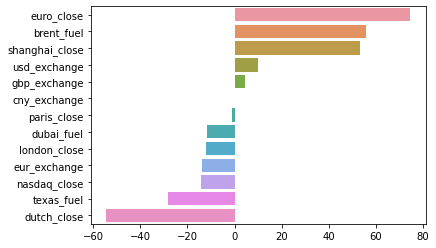

In [172]:
coef = pd.Series(lr.coef_, index = x_rolled.columns)
coef_sort = coef.sort_values(ascending =False)[:20]
sns.barplot(x = coef_sort.values, y = coef_sort.index)

<AxesSubplot:>

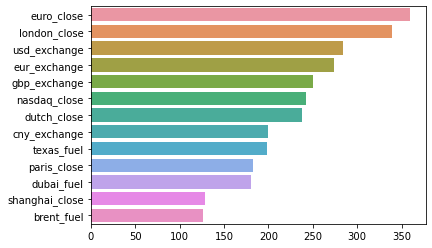

In [173]:
f_importances = pd.Series(lgbm.feature_importances_, index = x_rolled.columns)
ip_sort = f_importances.sort_values(ascending =False)[:20]
sns.barplot(x = ip_sort.values, y = ip_sort.index)

<AxesSubplot:>

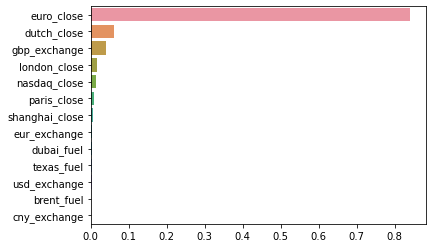

In [174]:
f_importances = pd.Series(rfr.feature_importances_, index = x_rolled.columns)
ip_sort = f_importances.sort_values(ascending =False)[:20]
sns.barplot(x = ip_sort.values, y = ip_sort.index)

<AxesSubplot:>

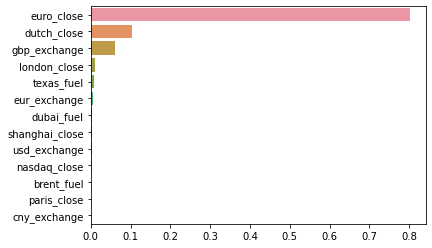

In [175]:
f_importances = pd.Series(xgb.feature_importances_, index = x_rolled.columns)
ip_sort = f_importances.sort_values(ascending =False)[:20]
sns.barplot(x = ip_sort.values, y = ip_sort.index)

# x값들 = 30일 전값

In [193]:
x_rolled = merge_df.drop('carbon_credit_price', axis= 1).shift(30).dropna()[:-1]

In [198]:
y_for_rolled =merge_df['carbon_credit_price'].shift(-1).dropna()[30:]

In [199]:
print(x_rolled.shape)
print(y_for_rolled.shape)

(1273, 13)
(1273,)


In [200]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_rolled, y_for_rolled, random_state=100)
scaler = StandardScaler()
scaler.fit(x_train1)

x_train_scaled1 = scaler.transform(x_train1)
x_test_scaled1 = scaler.transform(x_test1)

In [201]:
lr = LinearRegression()
rid = Ridge()
las = Lasso()
xgb = XGBRegressor()
lgbm = LGBMRegressor()
rfr = RandomForestRegressor()

lr.fit(x_train_scaled1, y_train1)
lr_preds = lr.predict(x_test_scaled1)
print('LinearRegression')
print('rmse :', np.sqrt(mean_squared_error(y_test1, lr_preds)))
print('r_score :', r2_score(y_test1, lr_preds))
print()

rid.fit(x_train_scaled1, y_train1)
rid_preds = rid.predict(x_test_scaled1)
print('Ridge')
print('rmse :', np.sqrt(mean_squared_error(y_test1, rid_preds)))
print('r_score :', r2_score(y_test1, rid_preds))
print()

las.fit(x_train_scaled1, y_train1)
las_preds = las.predict(x_test_scaled1)
print('Lasso')
print('rmse :', np.sqrt(mean_squared_error(y_test1, las_preds)))
print('r_score :', r2_score(y_test1, las_preds))
print()

xgb.fit(x_train_scaled1, y_train1)
xgb_preds = xgb.predict(x_test_scaled1)
print('XGBRegressor')
print('rmse :', np.sqrt(mean_squared_error(y_test1, xgb_preds)))
print('r_score :', r2_score(y_test1, xgb_preds))
print()

lgbm.fit(x_train_scaled1, y_train1)
lgbm_preds = lgbm.predict(x_test_scaled1)
print('LGBMRegressor')
print('rmse :', np.sqrt(mean_squared_error(y_test1, lgbm_preds)))
print('r_score :', r2_score(y_test1, lgbm_preds))
print()

rfr.fit(x_train_scaled1, y_train1)
rfr_preds = rfr.predict(x_test_scaled1)
print('RandomForestRegressor')
print('rmse :', np.sqrt(mean_squared_error(y_test1, rfr_preds)))
print('r_score :', r2_score(y_test1, rfr_preds))
print()

LinearRegression
rmse : 14.744070493631593
r_score : 0.9499877510500452

Ridge
rmse : 14.740940932971956
r_score : 0.9500089798899213

Lasso
rmse : 16.931393681422875
r_score : 0.9340481468998892

XGBRegressor
rmse : 5.513967531378876
r_score : 0.9930052854487841

LGBMRegressor
rmse : 5.364178230103131
r_score : 0.9933801524877763

RandomForestRegressor
rmse : 4.997573159546104
r_score : 0.9942540755948245



### => 0, 1로 볼 때 rolling 이용한 이동평균 값이 단순값보다 조금 더 예측력이 있어 보임

<AxesSubplot:>

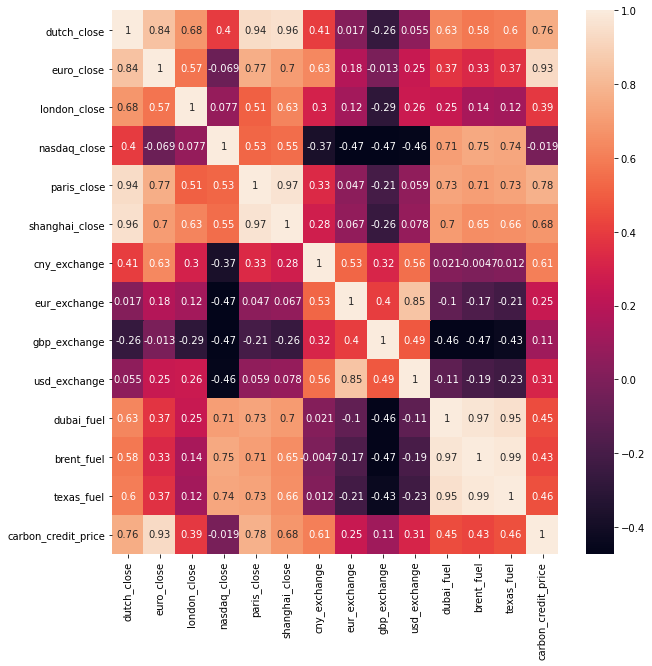

In [176]:
plt.figure(figsize=(10,10))
sns.heatmap(merge_df.corr(), annot=True)

### => euro_close랑 carbon 이랑 상관계수 0.93


# 3. euro Close만 가지고 모형 구축

In [180]:
x = merge_df['euro_close'].values.reshape(-1,1)[:-1]
y = merge_df['carbon_credit_price'].shift(-1).dropna()

In [181]:
print(x.shape)
print(y.shape)

(1303, 1)
(1303,)


In [182]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, random_state=100)
# scaler = StandardScaler()
# scaler.fit(x_train1)

# x_train_scaled1 = scaler.transform(x_train1)
# x_test_scaled1 = scaler.transform(x_test1)

In [183]:
lr = LinearRegression()
rid = Ridge()
las = Lasso()
xgb = XGBRegressor()
lgbm = LGBMRegressor()
rfr = RandomForestRegressor()

lr.fit(x_train1, y_train1)
lr_preds = lr.predict(x_test1)
print('LinearRegression')
print('rmse :', np.sqrt(mean_squared_error(y_test1, lr_preds)))
print('r_score :', r2_score(y_test1, lr_preds))
print()

rid.fit(x_train1, y_train1)
rid_preds = rid.predict(x_test1)
print('Ridge')
print('rmse :', np.sqrt(mean_squared_error(y_test1, rid_preds)))
print('r_score :', r2_score(y_test1, rid_preds))
print()

las.fit(x_train1, y_train1)
las_preds = las.predict(x_test1)
print('Lasso')
print('rmse :', np.sqrt(mean_squared_error(y_test1, las_preds)))
print('r_score :', r2_score(y_test1, las_preds))
print()

xgb.fit(x_train1, y_train1)
xgb_preds = xgb.predict(x_test1)
print('XGBRegressor')
print('rmse :', np.sqrt(mean_squared_error(y_test1, xgb_preds)))
print('r_score :', r2_score(y_test1, xgb_preds))
print()

lgbm.fit(x_train1, y_train1)
lgbm_preds = lgbm.predict(x_test1)
print('LGBMRegressor')
print('rmse :', np.sqrt(mean_squared_error(y_test1, lgbm_preds)))
print('r_score :', r2_score(y_test1, lgbm_preds))
print()

rfr.fit(x_train1, y_train1)
rfr_preds = rfr.predict(x_test1)
print('RandomForestRegressor')
print('rmse :', np.sqrt(mean_squared_error(y_test1, rfr_preds)))
print('r_score :', r2_score(y_test1, rfr_preds))
print()

LinearRegression
rmse : 24.362824674942402
r_score : 0.8774394831681318

Ridge
rmse : 24.36282467544235
r_score : 0.8774394831631017

Lasso
rmse : 24.362847947343496
r_score : 0.8774392490180358

XGBRegressor
rmse : 17.178844948105432
r_score : 0.9390626977467644

LGBMRegressor
rmse : 16.22017897927381
r_score : 0.9456741427517273

RandomForestRegressor
rmse : 17.590172514643065
r_score : 0.9361096155298968



<AxesSubplot:xlabel='date'>

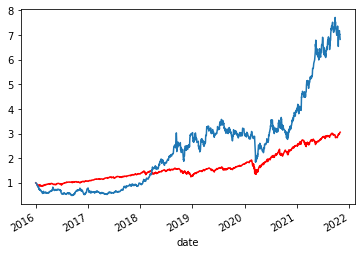

In [184]:
(merge_df['euro_close'].pct_change()+1).cumprod().plot(c='r')
(merge_df['carbon_credit_price'].pct_change()+1).cumprod().plot()

## 3.0.1 shanghai_close, chinses 위안

In [241]:
x_rolled = merge_df[['shanghai_close','cny_exchange']][1:]
y_for_rolled = merge_df['carbon_credit_price'].shift(-1).dropna()

In [243]:
print(x_rolled.shape)
print(y_for_rolled.shape)

(1303, 2)
(1303,)


In [244]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_rolled, y_for_rolled, random_state=100)
scaler = StandardScaler()
scaler.fit(x_train1)

x_train_scaled1 = scaler.transform(x_train1)
x_test_scaled1 = scaler.transform(x_test1)

In [245]:
lr = LinearRegression()
rid = Ridge()
las = Lasso()
xgb = XGBRegressor()
lgbm = LGBMRegressor()
rfr = RandomForestRegressor()

lr.fit(x_train_scaled1, y_train1)
lr_preds = lr.predict(x_test_scaled1)
print('LinearRegression')
print('rmse :', np.sqrt(mean_squared_error(y_test1, lr_preds)))
print('r_score :', r2_score(y_test1, lr_preds))
print()

rid.fit(x_train_scaled1, y_train1)
rid_preds = rid.predict(x_test_scaled1)
print('Ridge')
print('rmse :', np.sqrt(mean_squared_error(y_test1, rid_preds)))
print('r_score :', r2_score(y_test1, rid_preds))
print()

las.fit(x_train_scaled1, y_train1)
las_preds = las.predict(x_test_scaled1)
print('Lasso')
print('rmse :', np.sqrt(mean_squared_error(y_test1, las_preds)))
print('r_score :', r2_score(y_test1, las_preds))
print()

xgb.fit(x_train_scaled1, y_train1)
xgb_preds = xgb.predict(x_test_scaled1)
print('XGBRegressor')
print('rmse :', np.sqrt(mean_squared_error(y_test1, xgb_preds)))
print('r_score :', r2_score(y_test1, xgb_preds))
print()

lgbm.fit(x_train_scaled1, y_train1)
lgbm_preds = lgbm.predict(x_test_scaled1)
print('LGBMRegressor')
print('rmse :', np.sqrt(mean_squared_error(y_test1, lgbm_preds)))
print('r_score :', r2_score(y_test1, lgbm_preds))
print()

rfr.fit(x_train_scaled1, y_train1)
rfr_preds = rfr.predict(x_test_scaled1)
print('RandomForestRegressor')
print('rmse :', np.sqrt(mean_squared_error(y_test1, rfr_preds)))
print('r_score :', r2_score(y_test1, rfr_preds))
print()

LinearRegression
rmse : 40.343988350444036
r_score : 0.6639120331370862

Ridge
rmse : 40.34473963119523
r_score : 0.6638995158436052

Lasso
rmse : 40.384611010276
r_score : 0.6632348734780589

XGBRegressor
rmse : 29.63219898188148
r_score : 0.8186894536310414

LGBMRegressor
rmse : 26.933041585996666
r_score : 0.8502157644353386

RandomForestRegressor
rmse : 27.289186470497146
r_score : 0.8462282765740055



<AxesSubplot:>

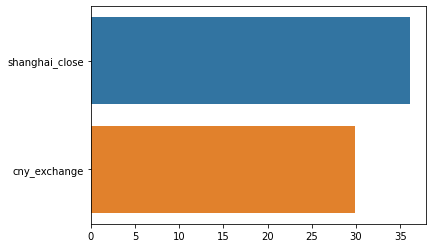

In [246]:
coef = pd.Series(lr.coef_, index = x_rolled.columns)
coef_sort = coef.sort_values(ascending =False)[:20]
sns.barplot(x = coef_sort.values, y = coef_sort.index)

<AxesSubplot:>

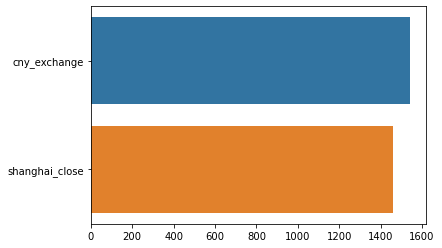

In [247]:
f_importances = pd.Series(lgbm.feature_importances_, index = x_rolled.columns)
ip_sort = f_importances.sort_values(ascending =False)[:20]
sns.barplot(x = ip_sort.values, y = ip_sort.index)

<AxesSubplot:>

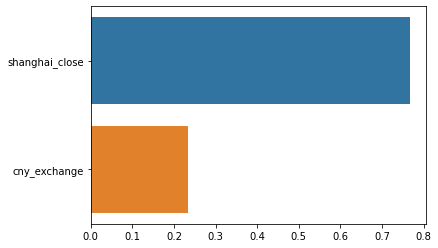

In [248]:
f_importances = pd.Series(rfr.feature_importances_, index = x_rolled.columns)
ip_sort = f_importances.sort_values(ascending =False)[:20]
sns.barplot(x = ip_sort.values, y = ip_sort.index)

# 3.1 주식시장만으로 모형 (5일치 rollingmean)

In [202]:
merge_df.columns

Index(['dutch_close', 'euro_close', 'london_close', 'nasdaq_close',
       'paris_close', 'shanghai_close', 'cny_exchange', 'eur_exchange',
       'gbp_exchange', 'usd_exchange', 'dubai_fuel', 'brent_fuel',
       'texas_fuel', 'carbon_credit_price'],
      dtype='object')

In [204]:
x_rolled = merge_df.drop(['cny_exchange', 'eur_exchange',
       'gbp_exchange', 'usd_exchange', 'dubai_fuel', 'brent_fuel',
       'texas_fuel', 'carbon_credit_price'], axis= 1).rolling(5).mean().dropna()[:-1]

In [209]:
y_for_rolled = merge_df['carbon_credit_price'].shift(-1).dropna()[4:]

In [211]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_rolled, y_for_rolled, random_state=100)
scaler = StandardScaler()
scaler.fit(x_train1)

x_train_scaled1 = scaler.transform(x_train1)
x_test_scaled1 = scaler.transform(x_test1)

In [212]:
lr = LinearRegression()
rid = Ridge()
las = Lasso()
xgb = XGBRegressor()
lgbm = LGBMRegressor()
rfr = RandomForestRegressor()

lr.fit(x_train_scaled1, y_train1)
lr_preds = lr.predict(x_test_scaled1)
print('LinearRegression')
print('rmse :', np.sqrt(mean_squared_error(y_test1, lr_preds)))
print('r_score :', r2_score(y_test1, lr_preds))
print()

rid.fit(x_train_scaled1, y_train1)
rid_preds = rid.predict(x_test_scaled1)
print('Ridge')
print('rmse :', np.sqrt(mean_squared_error(y_test1, rid_preds)))
print('r_score :', r2_score(y_test1, rid_preds))
print()

las.fit(x_train_scaled1, y_train1)
las_preds = las.predict(x_test_scaled1)
print('Lasso')
print('rmse :', np.sqrt(mean_squared_error(y_test1, las_preds)))
print('r_score :', r2_score(y_test1, las_preds))
print()

xgb.fit(x_train_scaled1, y_train1)
xgb_preds = xgb.predict(x_test_scaled1)
print('XGBRegressor')
print('rmse :', np.sqrt(mean_squared_error(y_test1, xgb_preds)))
print('r_score :', r2_score(y_test1, xgb_preds))
print()

lgbm.fit(x_train_scaled1, y_train1)
lgbm_preds = lgbm.predict(x_test_scaled1)
print('LGBMRegressor')
print('rmse :', np.sqrt(mean_squared_error(y_test1, lgbm_preds)))
print('r_score :', r2_score(y_test1, lgbm_preds))
print()

rfr.fit(x_train_scaled1, y_train1)
rfr_preds = rfr.predict(x_test_scaled1)
print('RandomForestRegressor')
print('rmse :', np.sqrt(mean_squared_error(y_test1, rfr_preds)))
print('r_score :', r2_score(y_test1, rfr_preds))
print()

LinearRegression
rmse : 14.84008407899063
r_score : 0.9456858824255963

Ridge
rmse : 14.869028871328707
r_score : 0.9454738022237565

Lasso
rmse : 17.447133399064025
r_score : 0.9249262398795983

XGBRegressor
rmse : 4.007787525863688
r_score : 0.9960385937407503

LGBMRegressor
rmse : 4.248044400157637
r_score : 0.9955494047545184

RandomForestRegressor
rmse : 4.13008982487158
r_score : 0.9957931308943311



<AxesSubplot:>

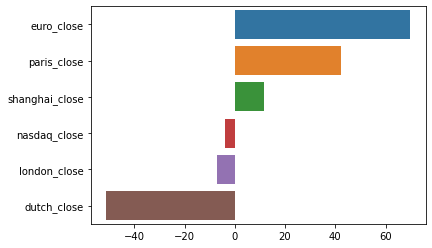

In [213]:
coef = pd.Series(lr.coef_, index = x_rolled.columns)
coef_sort = coef.sort_values(ascending =False)[:20]
sns.barplot(x = coef_sort.values, y = coef_sort.index)

<AxesSubplot:>

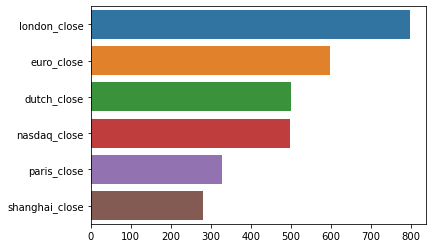

In [214]:
f_importances = pd.Series(lgbm.feature_importances_, index = x_rolled.columns)
ip_sort = f_importances.sort_values(ascending =False)[:20]
sns.barplot(x = ip_sort.values, y = ip_sort.index)

<AxesSubplot:>

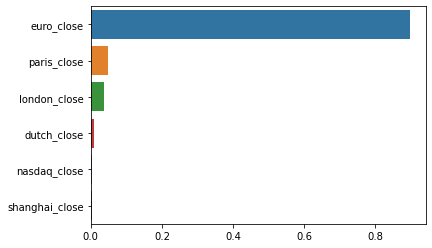

In [215]:
f_importances = pd.Series(rfr.feature_importances_, index = x_rolled.columns)
ip_sort = f_importances.sort_values(ascending =False)[:20]
sns.barplot(x = ip_sort.values, y = ip_sort.index)

# 3.2화폐가격만으로 모형 (5일치 rollingmean)

In [216]:
merge_df.columns

Index(['dutch_close', 'euro_close', 'london_close', 'nasdaq_close',
       'paris_close', 'shanghai_close', 'cny_exchange', 'eur_exchange',
       'gbp_exchange', 'usd_exchange', 'dubai_fuel', 'brent_fuel',
       'texas_fuel', 'carbon_credit_price'],
      dtype='object')

In [217]:
x_rolled = merge_df.drop(['dutch_close', 'euro_close', 'london_close', 'nasdaq_close',
       'paris_close', 'shanghai_close', 'dubai_fuel', 'brent_fuel',
       'texas_fuel', 'carbon_credit_price'], axis= 1).rolling(5).mean().dropna()[:-1]
y_for_rolled = merge_df['carbon_credit_price'].shift(-1).dropna()[4:]

In [219]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_rolled, y_for_rolled, random_state=100)
scaler = StandardScaler()
scaler.fit(x_train1)

x_train_scaled1 = scaler.transform(x_train1)
x_test_scaled1 = scaler.transform(x_test1)

In [220]:
lr = LinearRegression()
rid = Ridge()
las = Lasso()
xgb = XGBRegressor()
lgbm = LGBMRegressor()
rfr = RandomForestRegressor()

lr.fit(x_train_scaled1, y_train1)
lr_preds = lr.predict(x_test_scaled1)
print('LinearRegression')
print('rmse :', np.sqrt(mean_squared_error(y_test1, lr_preds)))
print('r_score :', r2_score(y_test1, lr_preds))
print()

rid.fit(x_train_scaled1, y_train1)
rid_preds = rid.predict(x_test_scaled1)
print('Ridge')
print('rmse :', np.sqrt(mean_squared_error(y_test1, rid_preds)))
print('r_score :', r2_score(y_test1, rid_preds))
print()

las.fit(x_train_scaled1, y_train1)
las_preds = las.predict(x_test_scaled1)
print('Lasso')
print('rmse :', np.sqrt(mean_squared_error(y_test1, las_preds)))
print('r_score :', r2_score(y_test1, las_preds))
print()

xgb.fit(x_train_scaled1, y_train1)
xgb_preds = xgb.predict(x_test_scaled1)
print('XGBRegressor')
print('rmse :', np.sqrt(mean_squared_error(y_test1, xgb_preds)))
print('r_score :', r2_score(y_test1, xgb_preds))
print()

lgbm.fit(x_train_scaled1, y_train1)
lgbm_preds = lgbm.predict(x_test_scaled1)
print('LGBMRegressor')
print('rmse :', np.sqrt(mean_squared_error(y_test1, lgbm_preds)))
print('r_score :', r2_score(y_test1, lgbm_preds))
print()

rfr.fit(x_train_scaled1, y_train1)
rfr_preds = rfr.predict(x_test_scaled1)
print('RandomForestRegressor')
print('rmse :', np.sqrt(mean_squared_error(y_test1, rfr_preds)))
print('r_score :', r2_score(y_test1, rfr_preds))
print()

LinearRegression
rmse : 52.23809343304472
r_score : 0.3270006563002009

Ridge
rmse : 52.235262031429656
r_score : 0.32707360994999135

Lasso
rmse : 52.29664169006017
r_score : 0.3254912206647391

XGBRegressor
rmse : 12.691636308460547
r_score : 0.9602739630725208

LGBMRegressor
rmse : 16.928397094385687
r_score : 0.9293240457839972

RandomForestRegressor
rmse : 13.105364940200866
r_score : 0.9576417271807018



<AxesSubplot:>

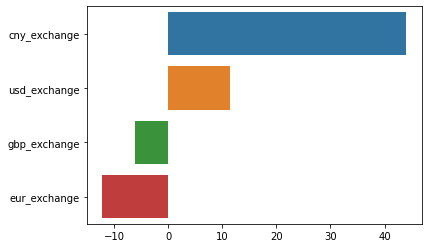

In [221]:
coef = pd.Series(lr.coef_, index = x_rolled.columns)
coef_sort = coef.sort_values(ascending =False)[:20]
sns.barplot(x = coef_sort.values, y = coef_sort.index)

<AxesSubplot:>

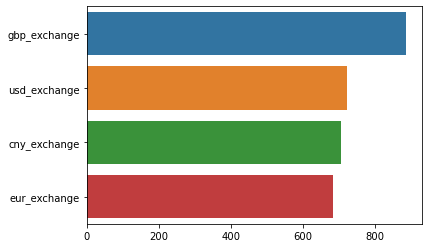

In [222]:
f_importances = pd.Series(lgbm.feature_importances_, index = x_rolled.columns)
ip_sort = f_importances.sort_values(ascending =False)[:20]
sns.barplot(x = ip_sort.values, y = ip_sort.index)

<AxesSubplot:>

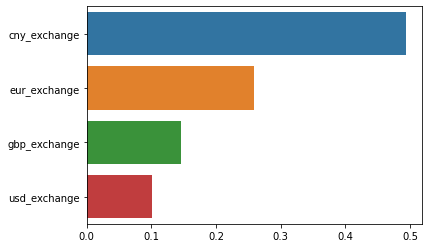

In [223]:
f_importances = pd.Series(rfr.feature_importances_, index = x_rolled.columns)
ip_sort = f_importances.sort_values(ascending =False)[:20]
sns.barplot(x = ip_sort.values, y = ip_sort.index)

# 3.3 유가만으로 모형 (5일치 rollingmean)

In [224]:
merge_df.columns

Index(['dutch_close', 'euro_close', 'london_close', 'nasdaq_close',
       'paris_close', 'shanghai_close', 'cny_exchange', 'eur_exchange',
       'gbp_exchange', 'usd_exchange', 'dubai_fuel', 'brent_fuel',
       'texas_fuel', 'carbon_credit_price'],
      dtype='object')

In [225]:
x_rolled = merge_df.drop(['dutch_close', 'euro_close', 'london_close', 'nasdaq_close',
       'paris_close', 'shanghai_close', 'cny_exchange', 'eur_exchange',
       'gbp_exchange', 'usd_exchange',  'carbon_credit_price'], axis= 1).rolling(5).mean().dropna()[:-1]
y_for_rolled = merge_df['carbon_credit_price'].shift(-1).dropna()[4:]

In [226]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_rolled, y_for_rolled, random_state=100)
scaler = StandardScaler()
scaler.fit(x_train1)

x_train_scaled1 = scaler.transform(x_train1)
x_test_scaled1 = scaler.transform(x_test1)

In [227]:
lr = LinearRegression()
rid = Ridge()
las = Lasso()
xgb = XGBRegressor()
lgbm = LGBMRegressor()
rfr = RandomForestRegressor()

lr.fit(x_train_scaled1, y_train1)
lr_preds = lr.predict(x_test_scaled1)
print('LinearRegression')
print('rmse :', np.sqrt(mean_squared_error(y_test1, lr_preds)))
print('r_score :', r2_score(y_test1, lr_preds))
print()

rid.fit(x_train_scaled1, y_train1)
rid_preds = rid.predict(x_test_scaled1)
print('Ridge')
print('rmse :', np.sqrt(mean_squared_error(y_test1, rid_preds)))
print('r_score :', r2_score(y_test1, rid_preds))
print()

las.fit(x_train_scaled1, y_train1)
las_preds = las.predict(x_test_scaled1)
print('Lasso')
print('rmse :', np.sqrt(mean_squared_error(y_test1, las_preds)))
print('r_score :', r2_score(y_test1, las_preds))
print()

xgb.fit(x_train_scaled1, y_train1)
xgb_preds = xgb.predict(x_test_scaled1)
print('XGBRegressor')
print('rmse :', np.sqrt(mean_squared_error(y_test1, xgb_preds)))
print('r_score :', r2_score(y_test1, xgb_preds))
print()

lgbm.fit(x_train_scaled1, y_train1)
lgbm_preds = lgbm.predict(x_test_scaled1)
print('LGBMRegressor')
print('rmse :', np.sqrt(mean_squared_error(y_test1, lgbm_preds)))
print('r_score :', r2_score(y_test1, lgbm_preds))
print()

rfr.fit(x_train_scaled1, y_train1)
rfr_preds = rfr.predict(x_test_scaled1)
print('RandomForestRegressor')
print('rmse :', np.sqrt(mean_squared_error(y_test1, rfr_preds)))
print('r_score :', r2_score(y_test1, rfr_preds))
print()

LinearRegression
rmse : 56.67685535888263
r_score : 0.20776961172071595

Ridge
rmse : 56.4820044113004
r_score : 0.21320751013058614

Lasso
rmse : 58.10866450626193
r_score : 0.16723628557650194

XGBRegressor
rmse : 32.64486294964253
r_score : 0.7371731655135729

LGBMRegressor
rmse : 28.600749236817833
r_score : 0.7982586951445048

RandomForestRegressor
rmse : 27.875663505340718
r_score : 0.8083581159383009



<AxesSubplot:>

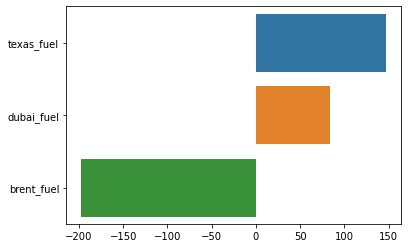

In [228]:
coef = pd.Series(lr.coef_, index = x_rolled.columns)
coef_sort = coef.sort_values(ascending =False)[:20]
sns.barplot(x = coef_sort.values, y = coef_sort.index)

<AxesSubplot:>

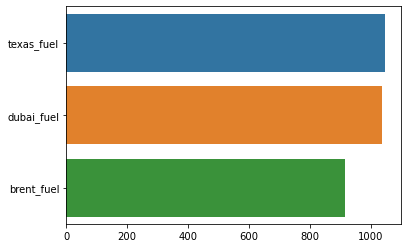

In [229]:
f_importances = pd.Series(lgbm.feature_importances_, index = x_rolled.columns)
ip_sort = f_importances.sort_values(ascending =False)[:20]
sns.barplot(x = ip_sort.values, y = ip_sort.index)

<AxesSubplot:>

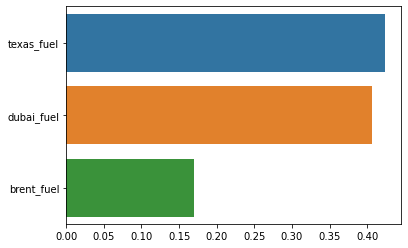

In [230]:
f_importances = pd.Series(rfr.feature_importances_, index = x_rolled.columns)
ip_sort = f_importances.sort_values(ascending =False)[:20]
sns.barplot(x = ip_sort.values, y = ip_sort.index)

# 3-4, 가장 설명력 높은 피쳐만 모아서 모형(eu_close, 위안, 텍사스).rolling5

In [231]:
merge_df.columns

Index(['dutch_close', 'euro_close', 'london_close', 'nasdaq_close',
       'paris_close', 'shanghai_close', 'cny_exchange', 'eur_exchange',
       'gbp_exchange', 'usd_exchange', 'dubai_fuel', 'brent_fuel',
       'texas_fuel', 'carbon_credit_price'],
      dtype='object')

In [232]:
x_rolled = merge_df[['euro_close', 'cny_exchange','texas_fuel']].rolling(5).mean().dropna()[:-1]
y_for_rolled = merge_df['carbon_credit_price'].shift(-1).dropna()[4:]

In [233]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_rolled, y_for_rolled, random_state=100)
scaler = StandardScaler()
scaler.fit(x_train1)

x_train_scaled1 = scaler.transform(x_train1)
x_test_scaled1 = scaler.transform(x_test1)

In [234]:
lr = LinearRegression()
rid = Ridge()
las = Lasso()
xgb = XGBRegressor()
lgbm = LGBMRegressor()
rfr = RandomForestRegressor()

lr.fit(x_train_scaled1, y_train1)
lr_preds = lr.predict(x_test_scaled1)
print('LinearRegression')
print('rmse :', np.sqrt(mean_squared_error(y_test1, lr_preds)))
print('r_score :', r2_score(y_test1, lr_preds))
print()

rid.fit(x_train_scaled1, y_train1)
rid_preds = rid.predict(x_test_scaled1)
print('Ridge')
print('rmse :', np.sqrt(mean_squared_error(y_test1, rid_preds)))
print('r_score :', r2_score(y_test1, rid_preds))
print()

las.fit(x_train_scaled1, y_train1)
las_preds = las.predict(x_test_scaled1)
print('Lasso')
print('rmse :', np.sqrt(mean_squared_error(y_test1, las_preds)))
print('r_score :', r2_score(y_test1, las_preds))
print()

xgb.fit(x_train_scaled1, y_train1)
xgb_preds = xgb.predict(x_test_scaled1)
print('XGBRegressor')
print('rmse :', np.sqrt(mean_squared_error(y_test1, xgb_preds)))
print('r_score :', r2_score(y_test1, xgb_preds))
print()

lgbm.fit(x_train_scaled1, y_train1)
lgbm_preds = lgbm.predict(x_test_scaled1)
print('LGBMRegressor')
print('rmse :', np.sqrt(mean_squared_error(y_test1, lgbm_preds)))
print('r_score :', r2_score(y_test1, lgbm_preds))
print()

rfr.fit(x_train_scaled1, y_train1)
rfr_preds = rfr.predict(x_test_scaled1)
print('RandomForestRegressor')
print('rmse :', np.sqrt(mean_squared_error(y_test1, rfr_preds)))
print('r_score :', r2_score(y_test1, rfr_preds))
print()

LinearRegression
rmse : 21.688478160181933
r_score : 0.883989268841259

Ridge
rmse : 21.689426759083243
r_score : 0.8839791205903852

Lasso
rmse : 21.7208996467664
r_score : 0.8836421673414194

XGBRegressor
rmse : 6.272097043027582
r_score : 0.990297904538254

LGBMRegressor
rmse : 6.295516504208498
r_score : 0.9902253157207491

RandomForestRegressor
rmse : 5.414519101256991
r_score : 0.9927696422648723



### => lr기준으로 봤을 때 eu_close만 넣은 것(shift(-1_).0.87)보다  조금 높아짐

<AxesSubplot:>

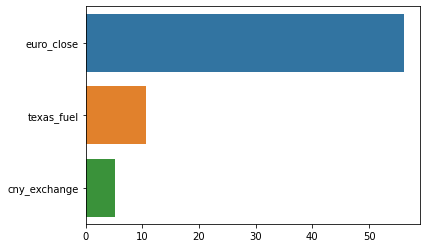

In [235]:
coef = pd.Series(lr.coef_, index = x_rolled.columns)
coef_sort = coef.sort_values(ascending =False)[:20]
sns.barplot(x = coef_sort.values, y = coef_sort.index)

<AxesSubplot:>

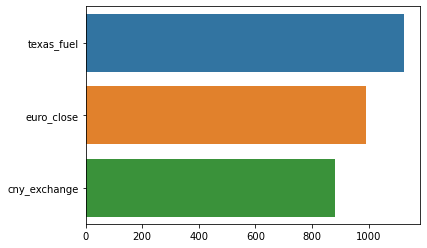

In [236]:
f_importances = pd.Series(lgbm.feature_importances_, index = x_rolled.columns)
ip_sort = f_importances.sort_values(ascending =False)[:20]
sns.barplot(x = ip_sort.values, y = ip_sort.index)

<AxesSubplot:>

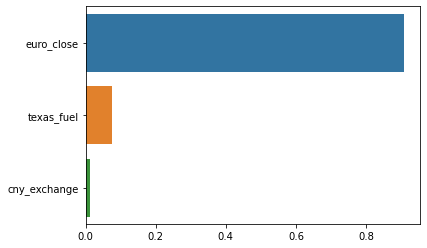

In [237]:
f_importances = pd.Series(rfr.feature_importances_, index = x_rolled.columns)
ip_sort = f_importances.sort_values(ascending =False)[:20]
sns.barplot(x = ip_sort.values, y = ip_sort.index)